In [43]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded


In [80]:
date = "MAY31"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1039_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

(radius < 3 && abs(goodMeson_bestVtx_Z) < 10)
!(radius < 3 && abs(goodMeson_bestVtx_Z) < 10)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


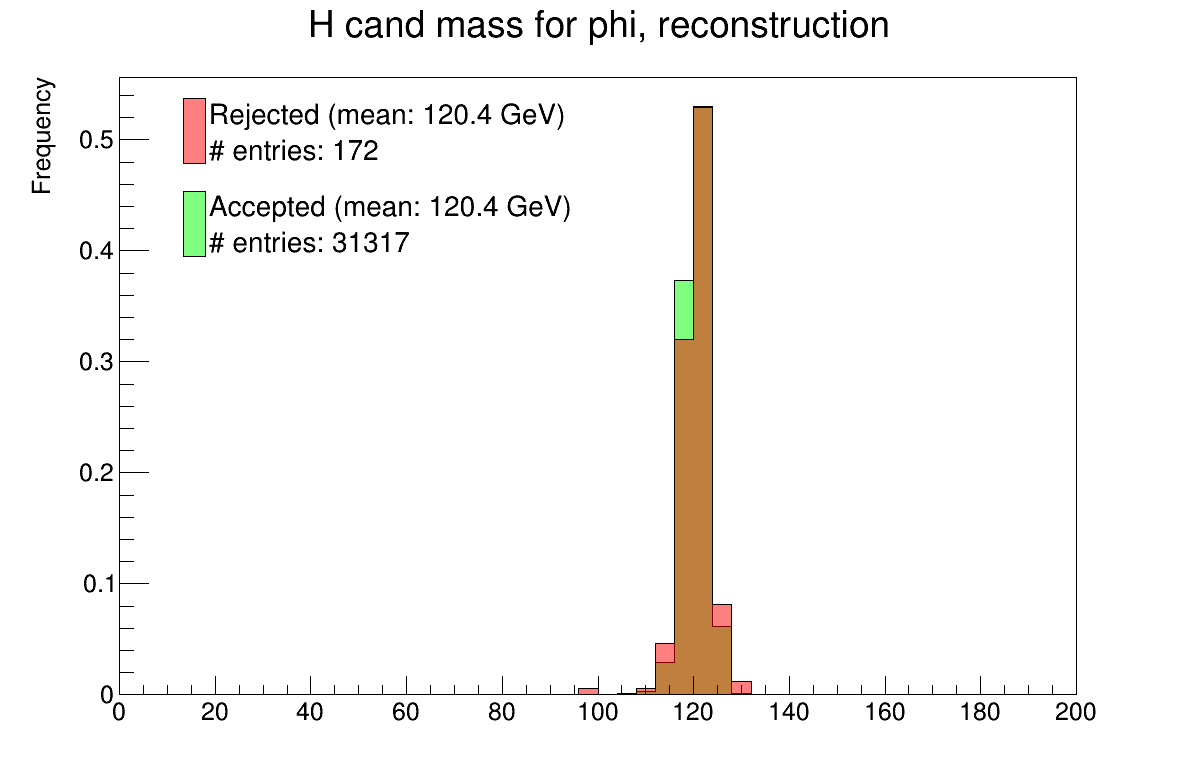

In [81]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

canvas.Divide(1, 3)

bins, xlow, xhigh = 50, 0, 200

filt = "(radius < 3 && abs(goodMeson_bestVtx_Z) < 10)"
nofilt = "!" + filt

print(filt)
print(nofilt)

#Kinematic Mass
hgood=df.Define("scale", "w*lumiIntegrated")\
    .Define("radius", "sqrt(goodMeson_bestVtx_X*goodMeson_bestVtx_X+goodMeson_bestVtx_Y*goodMeson_bestVtx_Y)")\
    .Define("filter", filt)\
    .Filter("filter[0]>0")\
    .Histo1D(("hist", "#phi kinematic mass", bins, xlow, xhigh),"HCandMass")
hbad=df.Define("scale", "w*lumiIntegrated")\
    .Define("radius", "sqrt(goodMeson_bestVtx_X*goodMeson_bestVtx_X+goodMeson_bestVtx_Y*goodMeson_bestVtx_Y)")\
    .Define("filter", nofilt)\
    .Filter("filter[0]>0")\
    .Histo1D(("hist", "#phi kinematic mass", bins, xlow, xhigh),"HCandMass")

hbad.SetFillColorAlpha(ROOT.kRed, 0.5)
hbad.SetLineColor(ROOT.kBlack)
hgood.SetFillColorAlpha(ROOT.kGreen, 0.5)
hgood.SetLineColor(ROOT.kBlack)

hbad.Scale(1/hbad.GetEntries())
hgood.Scale(1/hgood.GetEntries())


stack = ROOT.THStack("stack", "H cand mass for phi, reconstruction")
stack.Add(hgood.GetValue())
stack.Add(hbad.GetValue())
stack.Draw("hist nostack")
#stack.GetXaxis().SetTitle("p_{T}_{2trk}^{#phi#rightarrow #pi#pi} [GeV]")
stack.GetYaxis().SetTitle("Frequency")

legend = ROOT.TLegend(0.15, 0.65, 0.3, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(hbad.GetValue(), "#splitline{{Rejected (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hbad.GetMean(), 1), round(hbad.GetEntries(), 0)), "f")
legend.AddEntry(hgood.GetValue(), "#splitline{{Accepted (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hgood.GetMean(), 1), round(hgood.GetEntries(), 0)), "f")
legend.Draw()

canvas.Draw()


In [65]:
dfnew = df.Define("size", "goodMeson_charged_mass.size()").Filter("size  == 2").Define("radius", "sqrt(goodMeson_bestVtx_X*goodMeson_bestVtx_X+goodMeson_bestVtx_Y*goodMeson_bestVtx_Y)")

cols = ["goodMeson_charged_pt", "size", "goodMeson_vtx_prob", "radius", "HCandMass"]

x = dfnew.AsNumpy(columns=cols)

#print(df.AsNumpy(columns=cols)["mc"][0])

pddf = pd.DataFrame(x)

display(pddf)
#print(set(pddf["mc"]))

,goodMeson_charged_pt,size,goodMeson_vtx_prob,radius,HCandMass
0,"[27.749645233154297, 38.90623092651367]",2,"[0.28252995014190674, 0.8037798404693604]","[15.513128280639648, 0.03399030864238739]",116.530022
1,"[35.671287536621094, 37.223087310791016]",2,"[0.2510957419872284, 0.9030369520187378]","[28.596908569335938, 0.08703272044658661]",1.311011
2,"[35.719688415527344, 45.734352111816406]",2,"[0.4690823256969452, 0.0014971088385209441]","[0.07583993673324585, 0.04585704207420349]",191.261398
3,"[37.5802116394043, 143.471435546875]",2,"[0.12167343497276306, 0.17014658451080322]","[0.24943998456001282, 0.08824355155229568]",122.526978
4,"[30.987756729125977, 32.879764556884766]",2,"[0.8933829069137573, 0.7504865527153015]","[7.713479995727539, 0.042245808988809586]",108.167809
5,"[52.21836471557617, 59.82731628417969]",2,"[0.1377420723438263, 0.9984897971153259]","[18.135650634765625, 0.04852532967925072]",123.539467
6,"[60.51223373413086, 90.39034271240234]",2,"[0.32656705379486084, 0.3624761998653412]","[0.029951177537441254, 0.057445842772722244]",317.784637
7,"[44.719608306884766, 28.866662979125977]",2,"[0.5503227710723877, 0.46946486830711365]","[12.96454906463623, 0.07416965067386627]",127.151436
8,"[54.90004348754883, 60.341827392578125]",2,"[0.08994290232658386, 0.06364721059799194]","[11.253768920898438, 0.10105942189693451]",110.509117
9,"[34.9915771484375, 30.99136734008789]",2,"[0.8971648812294006, 0.0656503438949585]","[44.73624801635742, 0.06776806712150574]",103.033409


In [8]:

cols = ["mass_size", "lead", "leadval", "leadsum", "leadfiltered"]

x = new.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

display(pddf)

display(pddf[pddf["mass_size"] > 1])
#display(pddf[(pddf["goodMeson_vtx_prob_std"].notnull()) & (pddf["goodMeson_vtx_chi2dof_std"].notnull())])
#pddf = pddf[(pddf["goodMeson_vtx_prob_std"].notnull()) & (pddf["goodMeson_vtx_chi2dof_std"].notnull()) & (pddf["mass_size"] > 1)]
pddf = pddf[(pddf["mass_size"] > 1)]
display(pddf[pddf["leadsum"] < 2])

for c in cols:
    num = np.asarray(pddf[c])
    print(num, np.sum(num), np.count_nonzero(np.isnan(num)))
    counts, bins = np.histogram(num)
    plt.title(c)
    plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
    plt.show()
    print("min:", np.min(num), "max:", np.max(num), "avg:", np.average(num))
    for el in sorted(Counter(num).items(), key=lambda pair: pair[0]):
        print(el)

runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Define(basic_string_view<char,char_traits<char> > name, basic_string_view<char,char_traits<char> > expression) =>
    runtime_error: RDataFrame::Define: cannot define column "lead". A column with that name has already been Define'd. Use Redefine to force redefinition.
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Define(basic_string_view<char,char_traits<char> > name, basic_string_view<char,char_traits<char> > expression) =>
    runtime_error: RDataFrame::Define: cannot define column "lead". A column with that name has already been Define'd. Use Redefine to force redefinition.

In [4]:
#pddf["size"] = pddf.apply(lambda row: len(row["Pi0PhiGenPT"])*len(row["PionGenDR"]), axis=1)

#pddf["Pi0PhiGenPT"] = pddf["Pi0PhiGenPT"].apply(lambda vec: vec[0])
#pddf["PionGenDR"] = pddf["PionGenDR"].apply(lambda vec: vec[0])
#pddf = pddf[(pddf['size'] > 0)]

pt = np.asarray(pddf[(pddf['PionGenDR'] > 0.2)]["Pi0PhiGenPT"])
dr = np.asarray(pddf[(pddf['PionGenDR'] > 0.2)]["PionGenDR"])

pt = np.asarray(pddf["Pi0PhiGenPT"])
dr = np.asarray(pddf["PionGenDR"])

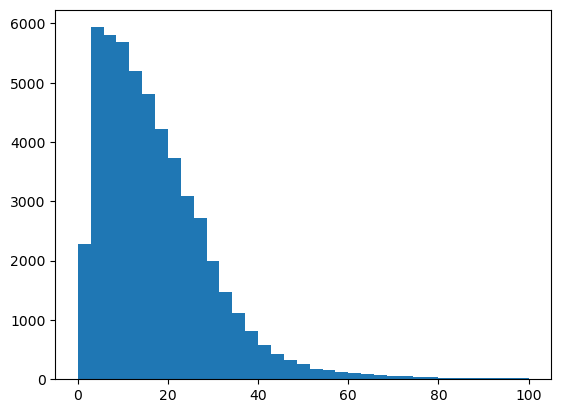

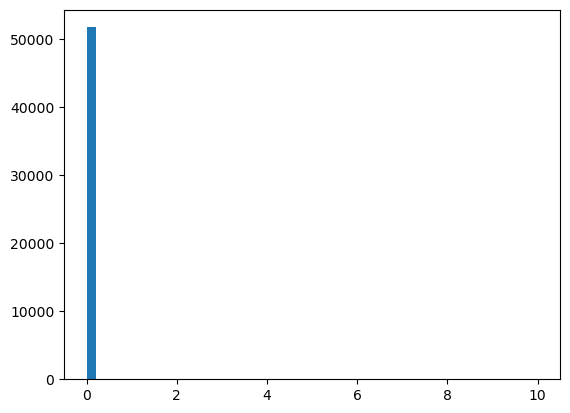

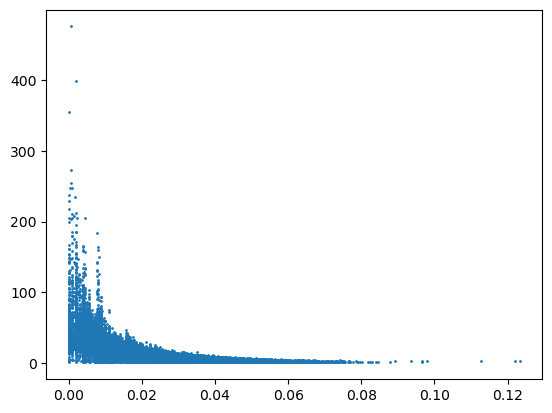

0.12334103882312775


In [6]:
counts, bins = np.histogram(pt, bins=35, range=(0,100))
plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
plt.show()

counts, bins = np.histogram(dr, bins=50, range=(0,10))
plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
plt.show()

plt.scatter(dr, pt, s=1)
plt.show()

print(np.max(dr))